# **Projet ISSD**


#### Kilian MOUGINOT
---

##### **Données retenues** : boardgames_dataset.csv

### <ins>1. Modules et mise en page</ins>

In [232]:
import numpy as np 
import csv
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
sns.set(color_codes = True)
sns.set(font_scale=1.5) 
from scipy import stats
from sklearn.linear_model import LinearRegression
import warnings
warnings.filterwarnings("ignore")

### <ins>2. Découverte des données</ins>

In [233]:
DATA = pd.read_csv('boardgames_dataset.csv', delimiter=';', index_col='name')

shape = DATA.shape  # Obtenir le nombre de ligne et de colonne du dataframe.
nbRow = shape[0]
nbColumn = shape[1]
print(shape)  

(20000, 17)


Le tableau est constitué de données caractérisant des jeux de plateaux répertoriés sur le site [boardgamegeek.com](linkurl).

Clé du tableau : **name**  <br />
Nombre de colonne : 17 <br />
Nombre de ligne : 2000

| Nom de la colonne | Description |    
|------------------:|:-----------:|
| yearpublished | Année de sortie du jeu |
| sortindex | Indice du jeu |
| minplayers | Nombre minimum de joueur |
| maxplayers | Nombre maximum de joueur |
| minplaytime | Durée minimum du jeu |
| maxplaytime | Durée maximum du jeu |
| minage | Age minimum conseillé pour jouer |
| usersrated | Nombre de personne ayant noté ce jeu |
| average | Note moyenne attribuée par les internautes |
| stddev | Ecart type des notes attribuées par les internautes |
| avgweight | Difficulté moyenne attribué à ce jeu sur 5|
| numweights | Nombre de personne ayant noté la difficulté de ce jeu |
| numcomments | Nombre de commentaire sur ce jeu|
| boardgamehonor | Prix remporté |
| boardgamecategory | Mot-clé(s) caractérisant le contexte du jeu |
| boardgamemechanic | Mot-clé(s) caractérisant le fonctionnement du jeu|
| boardgamefamily | Mot-clé(s) caractérisant le thème du jeu |

##### **Remarque** :
 * il pourrait être intéressant de tokeniser les colonnes board(*) afin de pouvoir analyser ces données qualitatives.

### <ins>3. Représentation graphique</ins>

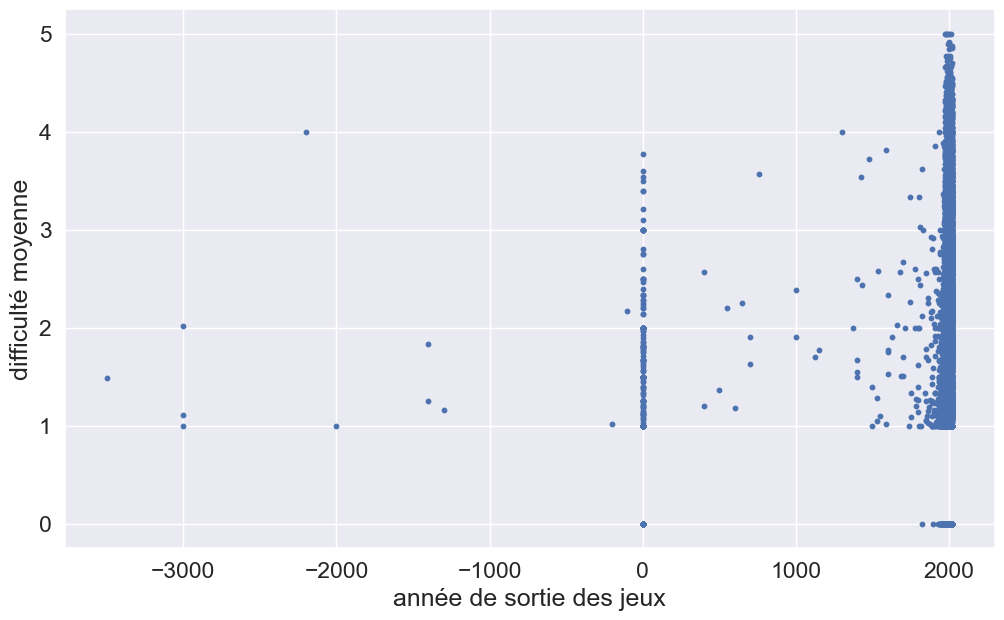

In [234]:
avgwheight =  DATA['avgweight'].to_numpy() 
yearpublished = DATA['yearpublished'].to_numpy()

plt.figure(figsize = (12, 7))
plt.scatter(yearpublished, avgwheight, s = 10)
plt.xlabel('année de sortie des jeux')
plt.ylabel('difficulté moyenne')
plt.show()

### Remarque :
* Un nombre relativement important de jeux sont sortis à l'an 0. On peut conjecturer un possible oubli de remplissage dans la base de donnée.
* La sous-population des jeux sortis avant l'an 0 est peu significative car très faible et empêche une bonne visualisation du graphe (échelle trop étendue). 

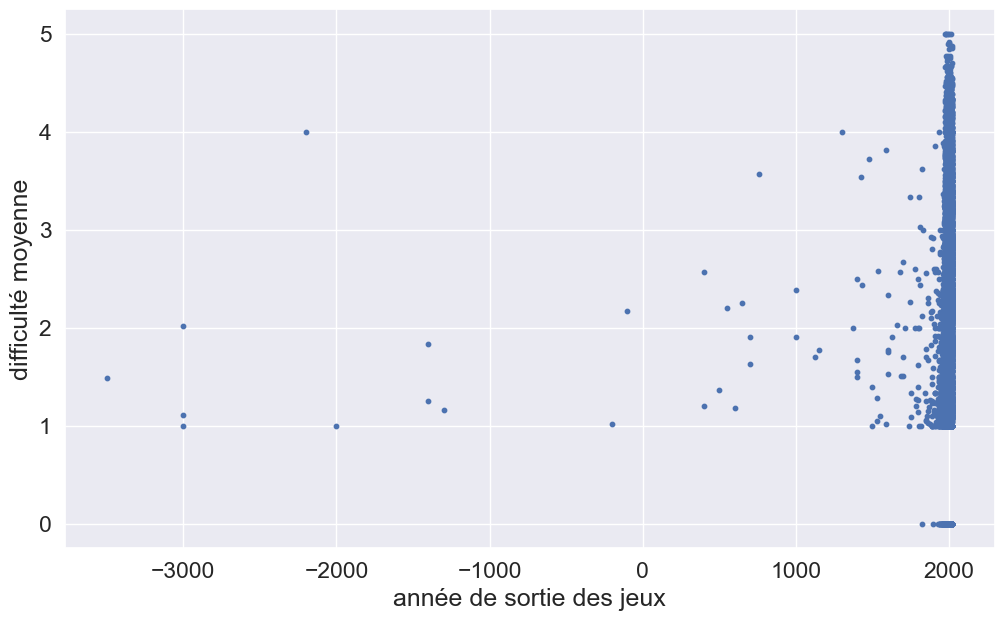

In [235]:
DATA_modif = DATA[DATA['yearpublished'] != 0]

avgwheight =  DATA_modif['avgweight'].to_numpy() 
yearpublished = DATA_modif['yearpublished'].to_numpy()

plt.figure(figsize = (12, 7))
plt.scatter(yearpublished, avgwheight, s = 10)
plt.xlabel('année de sortie des jeux')
plt.ylabel('difficulté moyenne')
plt.show()

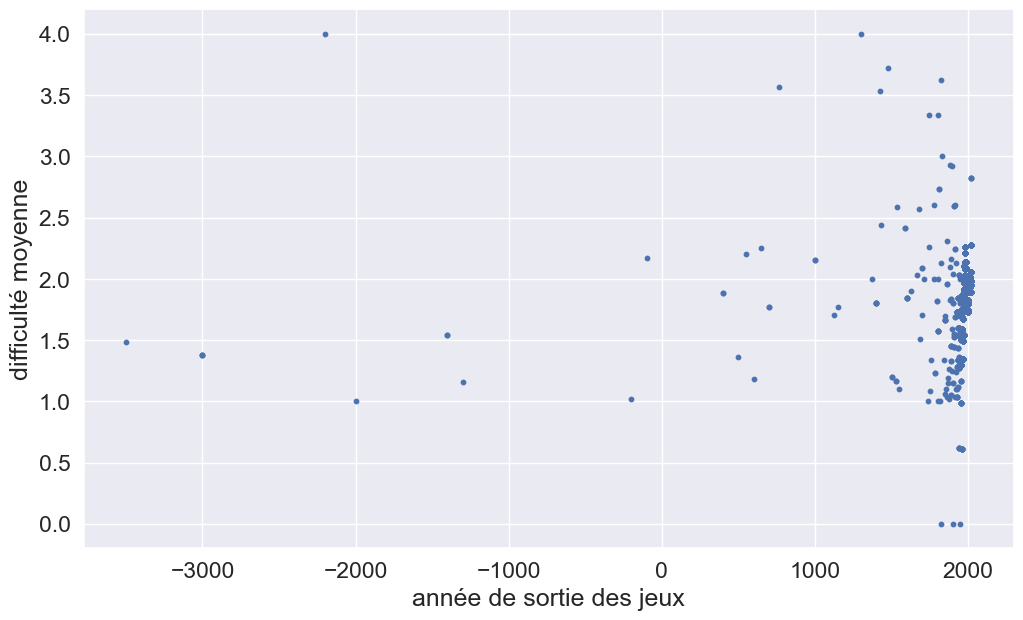

In [236]:
avgwheightList = []
for y in yearpublished :
    df = DATA_modif[DATA_modif['yearpublished'] == y]
    mean = df['avgweight'].mean()
    avgwheightList.append(mean)

avgwheightList = np.array(avgwheightList)

plt.figure(figsize = (12, 7))
plt.scatter(yearpublished, avgwheightList, s = 10)
plt.xlabel('année de sortie des jeux')
plt.ylabel('difficulté moyenne')
plt.show()

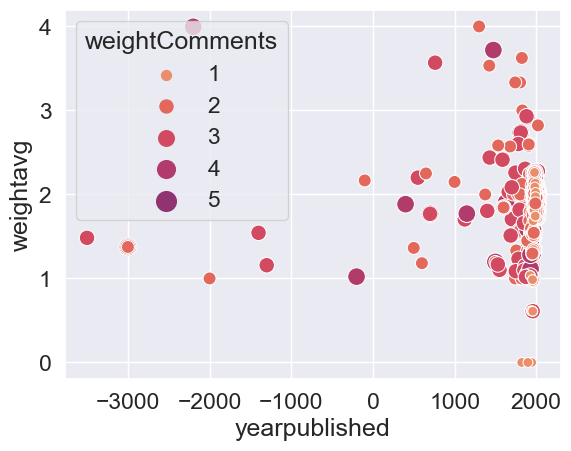

In [237]:
weightDF = DATA_modif.copy()
weightDF["weightavg"] = list(avgwheightList)
weightComments = [len(str(n)) for n in weightDF['numcomments']]
weightDF["weightComments"] = weightComments
 
plt.figure()
sns.scatterplot(x="yearpublished", y="weightavg",hue="weightComments", size="weightComments",sizes=(50, 200), palette = 'flare', hue_norm=(0, 7),legend="full", data=weightDF)
plt.show()

### <ins>4. Prétraitement des données</ins>

##### <ins>4.1 Données quantitatives</ins>

In [238]:
DATA.describe()

,yearpublished,sortindex,minplayers,maxplayers,minplaytime,maxplaytime,minage,usersrated,average,stddev,avgweight,numweights,numcomments
count,20000.000000,20000.000000,20000.000000,20000.00000,20000.000000,20000.00000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000
mean,1981.268700,10000.500000,2.055250,5.59215,68.096450,94.28945,9.476350,739.616350,6.275440,1.499691,1.931761,48.059050,191.515100
std,219.223277,5773.647028,0.745537,15.04921,466.502106,1005.75196,3.738842,3096.843206,1.065339,0.340743,0.897206,198.113638,606.892077
min,-3500.000000,1.000000,0.000000,0.00000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1997.000000,5000.750000,2.000000,4.00000,20.000000,30.00000,8.000000,47.000000,5.712778,1.309920,1.255050,4.000000,21.000000
50%,2008.000000,10000.500000,2.000000,4.00000,30.000000,45.00000,10.000000,105.000000,6.354170,1.471575,1.910900,9.000000,44.000000
75%,2015.000000,15000.250000,2.000000,6.00000,60.000000,90.00000,12.000000,333.250000,6.955793,1.663782,2.500000,25.000000,122.000000
max,2021.000000,20000.000000,10.000000,999.00000,60000.000000,120000.00000,25.000000,90730.000000,9.442860,4.500000,5.000000,7104.000000,17143.000000


##### **Remarques** :
 * Toutes les colonnes possèdent le même nombre d'élément donc il n'y a pas de trou de donnée.
 * Valeurs aberrantes dans certaines colonnes (<span style="color: #27AE60"> **Ex : ligne max -> colonne **yearpublished**** </span>).
 * Vérifier la présence de doublon.
 * On remarque que certains jeux possèdent leurs colonnes minplayers, maxplayers, minplaytime, maxplaytime ou minage nulles. Ces informations sont à prendre en compte en fonction de ce que l'on veut étudier.
 * La découverte graphique a montré que certains jeux avaient une note de difficulté de 0. Or, le site internet clarifie le système d'évaluation et indique que les notes ne puevent aller que jusqu'à 1. Les jeux notés avec une difficulté de 0 sont donc non-valides.

In [239]:
DATAclean = DATA.drop_duplicates() # Supprime les doublons.
print (DATAclean.shape == shape) # On remarque qu'il n'y a pas de doublons.

True


In [240]:
DATA = DATA[DATA['avgweight'] != 0] #supprime les jeux notés à 0 en difficulté
shape = DATA.shape  # Obtenir le nombre de ligne et de colonne du dataframe.
nbRow = shape[0]
nbColumn = shape[1]

##### **Valeurs aberrantes** :


In [241]:
aberrantValueYear = DATA[DATA['yearpublished'] == -3500]
aberrantValueYear.head()

,yearpublished,sortindex,minplayers,maxplayers,minplaytime,maxplaytime,minage,usersrated,average,stddev,avgweight,numweights,numcomments,boardgamehonor,boardgamecategory,boardgamemechanic,boardgamefamily
name,,,,,,,,,,,,,,,,,
Senet,-3500,6827,2,2,30,30,6,592,5.89218,1.63069,1.4833,60,285,['None'],"['Abstract Strategy', 'Dice', 'Religious']","['Dice Rolling', 'Roll / Spin and Move']","['Continent: Africa', 'Country: Egypt', 'Gammon']"


In [242]:
aberrantValueTime = DATA[DATA['minplaytime'] == 60000]
aberrantValueTime.head()

,yearpublished,sortindex,minplayers,maxplayers,minplaytime,maxplaytime,minage,usersrated,average,stddev,avgweight,numweights,numcomments,boardgamehonor,boardgamecategory,boardgamemechanic,boardgamefamily
name,,,,,,,,,,,,,,,,,
The Campaign for North Africa,1979,14952,8,10,60000,60000,14,137,5.82562,2.9008,4.6667,78,137,['None'],"['Wargame', 'World War II']",['Hexagon Grid'],['Campaign for North Africa']


Après quelques recherches sur internet, ces valeurs, bien que très eloignées de la tendance des autres jeux sont réelles. Selon ce que l'on veut montrer à travers nos graphiques, il sera pertinent de les écarter ou pas du jeu de donnée. <br />
Par exemple, la définition d'un domaine limité pour l'année de sortie pourrait être pertinente.

##### <ins>4.2 Données qualitatives</ins>

In [243]:
boardgameColumnList = ['boardgamehonor', 'boardgamemechanic', 'boardgamefamily'] 

for column in boardgameColumnList :         # teste si les colonnes qualitatives sont complètes
    print(len(DATA[column]) == nbRow)

True
True
True


## Problématique : Quels critères influencent lors de l'évaluation de la difficulté d'un jeu ?

#### Les jeux difficiles possèdent ils des mots clés en commun ? - Non réalisé


#### Y a-t-il un lien entre le nombre de prix remporté par un jeu et sa difficulté ? - Non-réalisé

In [244]:
# awardDATA = DATA.copy()
# awardCount = []
# for i in range (len(awardDATA["boardgamehonor"])) :
#     if 'None' in awardDATA["boardgamehonor"][i] :
#         awardCount.append(0)
#     else :
#         awardCount.append(awardDATA["boardgamehonor"][i])
# print(awardCount) 

### <ins>5. Influence de la durée de jeu sur la difficulté</ins>

Dans un premier temps, regardons la difficulté moyenne des jeux selon leur durée minimal. J'ai trouvé plus pertinent de m'intéresser au temps minimal de jeu plutôt que le temps maximal car selon moi, celui-ci est plus significatif car un jeu simple peut très bien être jouer à l'infini tandis qu'un jeu difficile nécessite forcement une durée relativement longue.
J'etudierai uniquement les jeux dont la durée est inférieur à 5000 minutes afin de ne pas trop etendre mes graphiques. Ca n'influera pas sur les résultats au vu du faible échantillon que je retire. Comme précisé lors du prétraitement, j'effectue un tri pour ne pas garder les données dont le temps de jeu minimal est nulle pour ne pas fausser mes analyses.

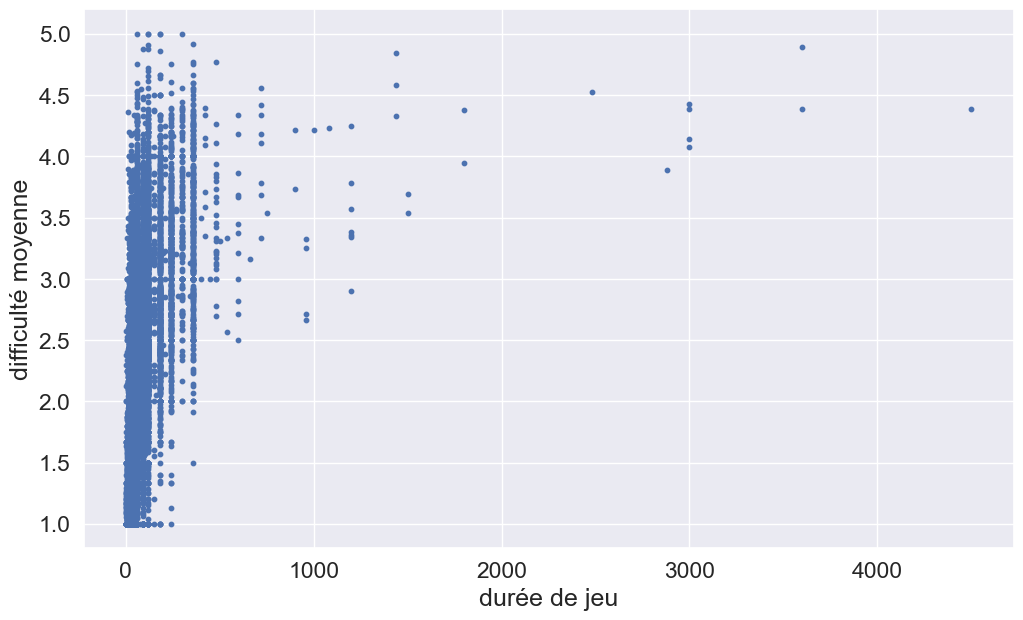

In [245]:
durationDATA = DATA[DATA["minplaytime"] < 5000]                     # Creation du DataFrame (df)
durationDATA = durationDATA[durationDATA['minplaytime']!= 0]

avgwheight =  durationDATA['avgweight'].to_numpy() 
duration =  durationDATA['minplaytime'].to_numpy() 

plt.figure(figsize = (12, 7))
plt.scatter(duration, avgwheight, s = 10)
plt.xlabel('durée de jeu')
plt.ylabel('difficulté moyenne')
plt.show()

On remarque que plus la durée de jeu augmente, plus on tend à un jeu assez difficile (>4). En revanche, une durée de jeu courte n'implique pas que le jeu est simple comme le montre le graphe précédent.
Pour chaque durée de jeu, on va calculer la moyenne de difficulté de ces jeux afin de reduire le nombre de point et pouvoir ainsi mieux repérer une tendance.

In [246]:
avgweightList = []
for d in durationDATA['minplaytime'] :                      # moyenne de difficulté pour une meme durée de temps de jeu
    df = durationDATA[durationDATA['minplaytime'] == d]
    mean = df['avgweight'].mean()
    avgweightList.append(mean)

avgweightList = np.array(avgweightList)
duration = durationDATA['minplaytime'].to_numpy()

In [247]:
durationDATA["weightavg"] = avgweightList   # creation d'une nouvelle colonne dans le df repertoriant le poids moyen de tous les jeux selon la durée

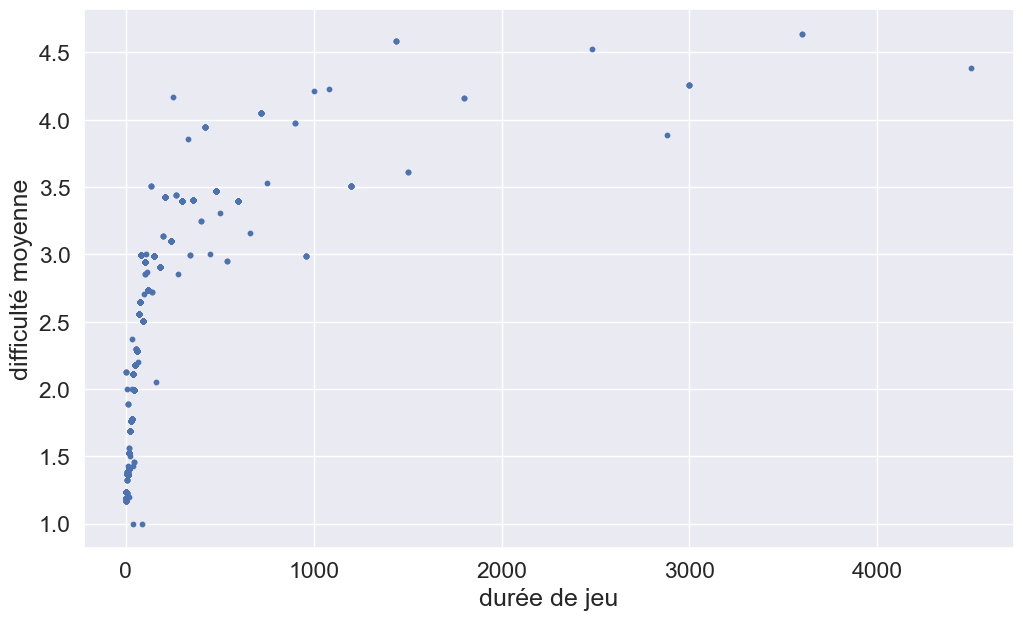

In [248]:
plt.figure(figsize = (12, 7))
plt.scatter(duration, avgweightList, s = 10)
plt.xlabel('durée de jeu')
plt.ylabel('difficulté moyenne')
plt.show()

On remarque une tendance exponentielle, le nombre de personne ayant évalué la difficulté des jeux pourrait nous aider. On va donc utilisé un graphe multidimensionnel.<br />
Je vais créer une nouvelle colonne dans le dataframe qui évaluera l'importance d'une donnée à partir du nombre d'évaluation donné à celle-ci.

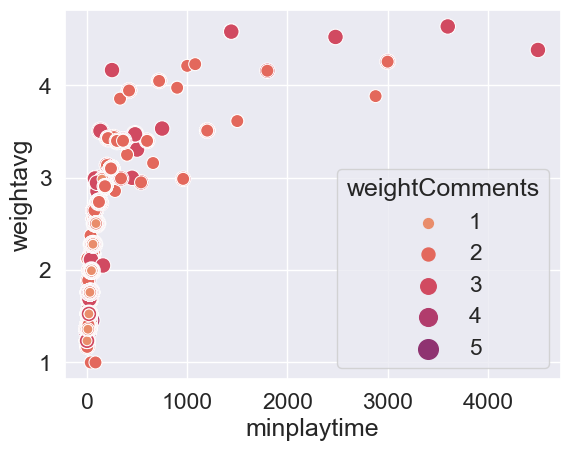

In [249]:
weightComments = [len(str(n)) for n in durationDATA['numcomments']] #correspond au nombre de puissance de 10 de commentaire sous le jeu
durationDATA["weightComments"] = weightComments

plt.figure()
sns.scatterplot(x="minplaytime", y="weightavg",hue="weightComments", size="weightComments",sizes=(50, 200), palette = 'flare', hue_norm=(0, 7),legend="full", data=durationDATA)
plt.show()

Pour plus de clarté et de pertinence, on va garder uniquement les points dont le weightComments est supérieur à 3.

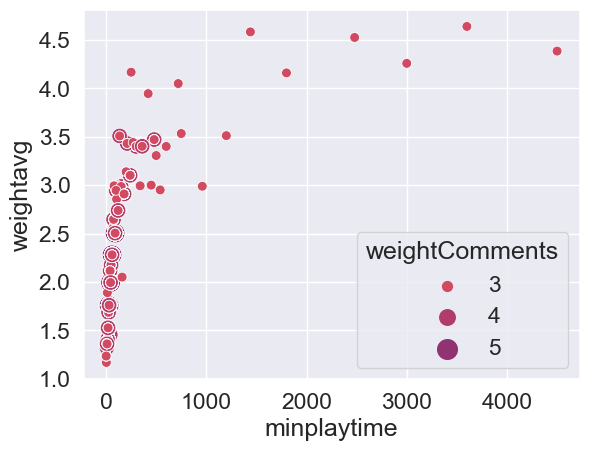

In [250]:
df = durationDATA[durationDATA["weightComments"] >= 3]      # creation d'un nouveau df

plt.figure()
sns.scatterplot(x="minplaytime", y="weightavg",hue="weightComments", size="weightComments",sizes=(50, 200), palette = 'flare', hue_norm=(0, 7),legend="full", data=df)
plt.show()

On remarque une courbe de la forme t -> A - exp(a*t + b).<br />
En effectuant une régression sur ce nuage de points, je vais pouvoir déterminer si il y a ou pas une relation entre le temps minimal de jeu et la difficulté moyenne des jeux.
Cela nous permettrait de predire la difficulté d'un jeu en fonction de la durée minimal de celle-ci. On pourra d'autre part comparer avec les données > 5000 minutes qu'on a laissé de côté précedemment.

In [251]:
df["logAvgweight"] = np.log(-df["weightavg"] + 4.7)

print("corrélation :"+ str(df["weightavg"].corr(df["minplaytime"]))) #correlation entre les deux variables

y = df["logAvgweight"].to_numpy() 
x = df["minplaytime"].to_numpy()

a, b = np.polyfit(x, y, 1)  # regression exponentielle
print(a,b)

corrélation :0.5917374097960857
-0.0014093510639664319 1.0327700532462485


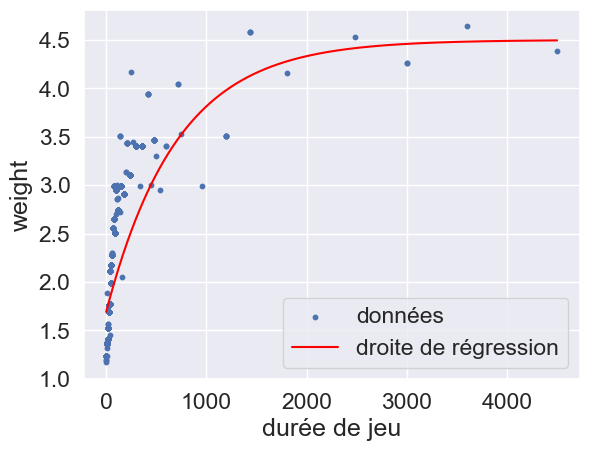

In [252]:
playtime = df["minplaytime"].to_numpy()
weightavg = df["weightavg"].to_numpy()

t = np.linspace(0,4500,4001)            # trace de la regression
regression = 4.5 - np.exp(a*t + b)

plt.figure()
plt.scatter(playtime, weightavg, s=10)
plt.plot(t, regression,color = 'red')
plt.ylabel('weight')
plt.xlabel('durée de jeu')
plt.legend(['données', 'droite de régression'])
plt.show()

### **Prédiction**

Cette courbe nous permet donc de prédire la difficulté moyenne d'un jeu à partir de sa durée de jeu. On peut ainsi vérifier la difficulté des jeux dont les valeurs sont supérieurs à 5000 min.

In [253]:
aberrantValueTime = DATA[DATA['minplaytime'] > 5000]
aberrantValueTime.head(10)

print('difficulté moyenne : ' + str(aberrantValueTime['avgweight'].mean()))

difficulté moyenne : 4.203316666666666


La courbe théorique proposait une valeur moyenne de 4.5 donc on a tout de même un écart de 0.3 en terme de difficulté. Ce n'est pas étonnant car d'autres paramètres entrent en compte comme les mechanics des jeux par exemple ou encore certaines notes peuvent être remises en causes si l'echantillon de personne ayant voté est trop faible.</br>
##### On peut refaire le calcul en négligeant les jeux qui n'ont pas assez été évalués.

In [254]:
weightComments = [len(str(n)) for n in aberrantValueTime['numcomments']] #correspond au nombre de puissance de 10 de commentaire sous le jeu
aberrantValueTime["weightComments"] = weightComments
aberrantValueTime.head(10)

aberrantValueTime = aberrantValueTime[aberrantValueTime['weightComments'] > 2]
print('difficulté moyenne : ' + str(aberrantValueTime['avgweight'].mean()))

difficulté moyenne : 4.405833333333333


On a maintenant une moyenne de 4.4 donc une difference de 0.1 en terme de difficulté par rapport à ce qui était prevu. On remarque donc que le résultat est plus pertinent en ajoutant les paramètres de poids des commentaires. </br>
Cependant, il est à noter que l'échantillon de données "aberrantes" est très faible par rapport à celui avec lequelle on a effectué la regression. Le résultat est donc à relativiser car il faudrait plus de paramètre validant l'hypothèse.

### Etude d'une sous-population : durée de jeu entre 0 et 100min

In [255]:
subDATA = DATA[(DATA['minplaytime'] < 100) & (DATA['minplaytime'] != 0)] #definition d'un df dont le playtime est compris entre 0 et 100

weight = []
for d in subDATA['minplaytime'] :                      # moyenne de difficulté pour une meme durée de temps de jeu
    df = subDATA[subDATA['minplaytime'] == d]
    mean = df['avgweight'].mean()
    weight.append(mean)

subDATA['weightavg'] = weight
weight = np.array(weight)
duration = subDATA['minplaytime'].to_numpy()

print("corrélation :"+ str(subDATA["weightavg"].corr(subDATA["minplaytime"]))) #correlation entre les deux variables

corrélation :0.9736258128739201


La valeur de la corrélation montre qu'il y a ici une relation proportionnelle entre le temps de jeu et la difficulté entre 0 et 100min. En effet, un jeu difficile ne peut pas avoir un temps de jeu trop faible car il y a la plupart du temps une réfléxion à apporter à chaque décision faite, des règles plus difficiles à assimiler, etc.
En traçant une régression on va pouvoir bien établir la courbe de progression de difficulté.

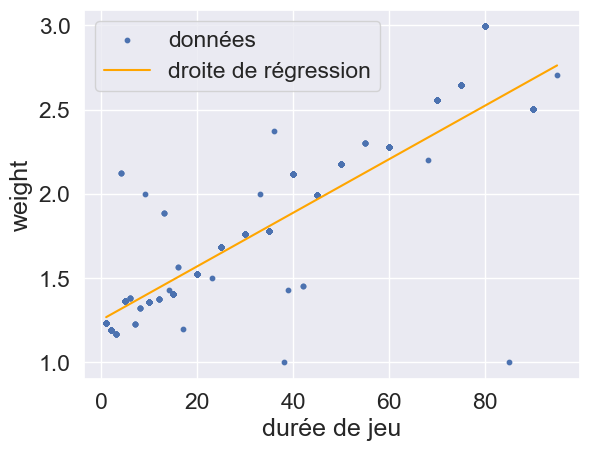

In [256]:
X = duration
X = X.reshape(-1, 1) # étape nécessaire pour la mise en forme des données attendue par LinearRegression
Y = weight
Y = Y.reshape(-1, 1)
linear_regressor = LinearRegression(copy_X=True, fit_intercept=True)

result = linear_regressor.fit(X, Y)
slope = (result.intercept_ + np.max(X)*result.coef_[0] - result.intercept_ + np.min(X)*result.coef_[0])/(np.max(X)-np.min(X))
weightComments = [len(str(n)) for n in subDATA['numcomments']]
subDATA["weightComments"] = weightComments

plt.figure()
plt.scatter(duration, weight, s=10)
plt.plot([np.min(X), np.max(X)], [result.intercept_ + np.min(X)*result.coef_[0], result.intercept_ + np.max(X)*result.coef_[0]], 'orange')
plt.legend(['données', 'droite de régression'])
plt.xlabel('durée de jeu')
plt.ylabel('weight')
plt.show()

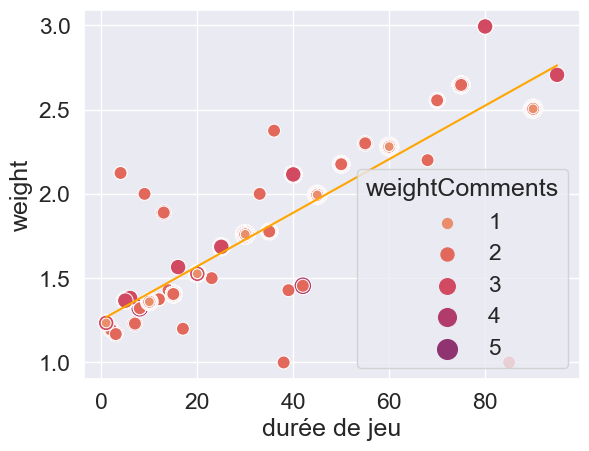

In [257]:
plt.figure()
sns.scatterplot(x="minplaytime", y="weightavg",hue="weightComments", size="weightComments",sizes=(50, 200), palette = 'flare', hue_norm=(0, 7),legend="full", data=subDATA)
plt.plot([np.min(X), np.max(X)], [result.intercept_ + np.min(X)*result.coef_[0], result.intercept_ + np.max(X)*result.coef_[0]], 'orange')
plt.xlabel('durée de jeu')
plt.ylabel('weight')
plt.show()

Les données les plus verifiées (celles avec le plus gros weightComments) sont assez proche de la courbe, ce qui me laisse penser que la régression est ici assez bonne.</br>


### Comparaison entre la sous-population et la population globale

##### A partir de quand la difficulté moyenne d'un jeu n'est-elle plus proportionnelle au temps de jeu ?

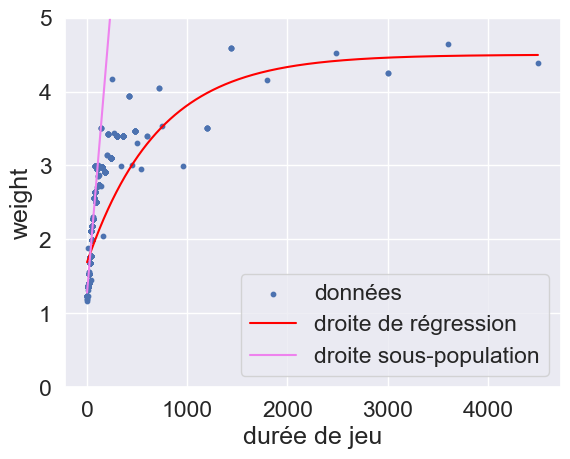

In [258]:
plt.figure()
plt.scatter(playtime, weightavg, s=10)
plt.plot(t, regression,color = 'red')
plt.plot(t,slope*t + 1.28, color='violet')
plt.ylim(0,5)
plt.ylabel('weight')
plt.xlabel('durée de jeu')
plt.legend(['données', 'droite de régression', 'droite sous-population'])
plt.show()

On remarque qu'au dela de l'echantillon de 100min, la difficulté n'est plus proportionnelle au temps de jeu et ne suit pas du tout la regression exponentielle comme on s'y attendait.</br>
Cependant, on voit que la courbe de sous-population suit des points qui s'ecartent de la droite de regression. On aperçoit donc une autre sous-population dont la difficulté est directement proportionnelle à la durée minimal de jeu. Il serait intéressant de mettre toutes ses données dans un DataFrame et d'analyser si il y aurait des similitudes.

## Conclusion

On a pu voir que la difficulté d'un jeu est un paramètre qui varie selon la durée minimale de celui-ci. Les régressions réalisées ont pu montrer qu'il était possible de prédire le comportement de l'évaluation de la difficulté des jeux à l'aide de sa durée minimale mais pas prédire exactement ou avec une différence négligeable. En effet, plusieurs autres critères dont je n'ai pas eu le temps de me focaliser dessus auraient été intéressants si mis en relation avec la difficulté d'un jeu.</br>
La note attribué à un jeu, l'âge minimal conseillé pour jouer ou encore le nombre de prix remporté auraient pu nous aiguiller et préciser la prédiction de l'évaluation de la difficulté d'un jeu.</br>
D'autre part, J'ai pu remarqué la présence d'une sous-population dont la difficulté est à priori directement proportionnelle au temps de jeu minimal de celui-ci. j'aurai voulu voir s'il y avait des similitudes dans leurs paramètres.